# Data Loading, Storage, and File Formats

## 6.1 Reading and Writing Data in Text Format

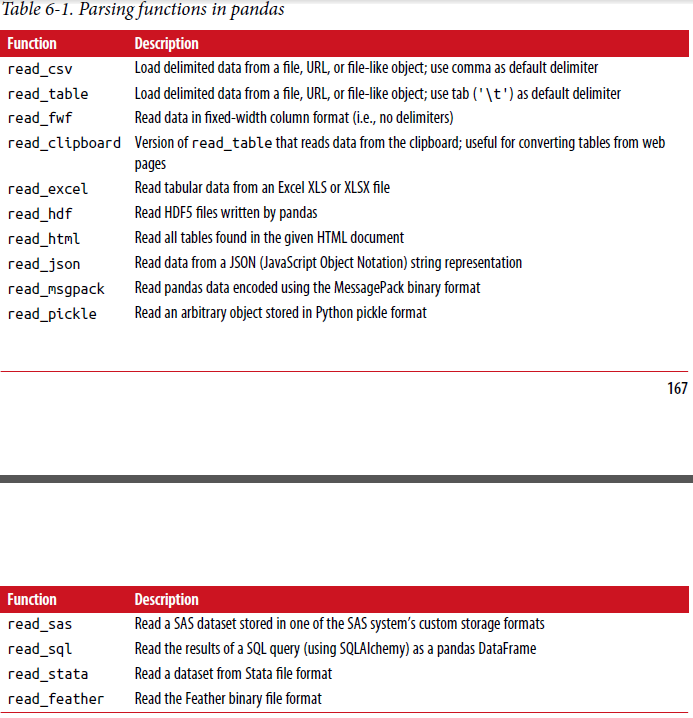

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('ex1.csv')

df


,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [3]:
pd.read_table('ex1.csv', sep=',')

C:\Users\Asif\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [4]:
pd.read_csv('ex1.csv', header=None)

,0,1,2,3,4,5
0,class,section,std1,std2,std3,std4
1,one,a,1,2,3,4
2,one,b,5,6,7,8
3,one,c,9,10,11,12
4,one,d,13,14,15,16
5,two,e,17,18,19,20
6,two,f,21,22,23,24
7,two,g,25,26,27,28
8,two,h,29,30,31,32


In [5]:
pd.read_csv('ex1.csv')

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [6]:

pd.read_csv('ex1.csv', index_col=['class','section']) #the message column to be the index of the returned


std1  std2  std3  std4
class section                        
one   a           1     2     3     4
      b           5     6     7     8
      c           9    10    11    12
      d          13    14    15    16
two   e          17    18    19    20
      f          21    22    23    24
      g          25    26    27    28
      h          29    30    31    32

In [7]:
list(open('ex1.csv'))

['class,section,std1,std2,std3,std4\n',
 'one,a,1,2,3,4\n',
 'one,b,5,6,7,8\n',
 'one,c,9,10,11,12\n',
 'one,d,13,14,15,16\n',
 'two,e,17,18,19,20\n',
 'two,f,21,22,23,24\n',
 'two,g,25,26,27,28\n',
 'two,h,29,30,31,32\n']

In [11]:
result = pd.read_table('ex1.csv', sep=',')  # \s+
result

C:\Users\Asif\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [17]:
result = pd.read_csv('ex1.csv', sep=',',skiprows = [2,3,4])
result

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,two,e,17,18,19,20
2,two,f,21,22,23,24
3,two,g,25,26,27,28
4,two,h,29,30,31,32


In [14]:
pd.isnull(result)

,class,section,std1,std2,std3,std4
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [15]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('ex1.csv', na_values=sentinels)

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32



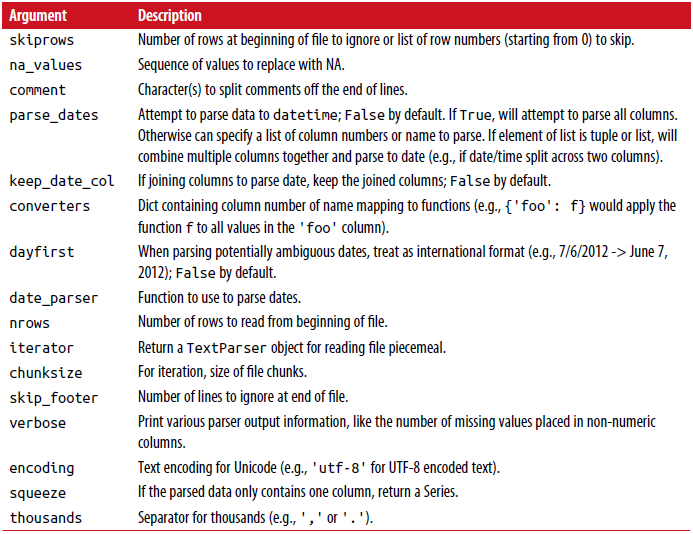


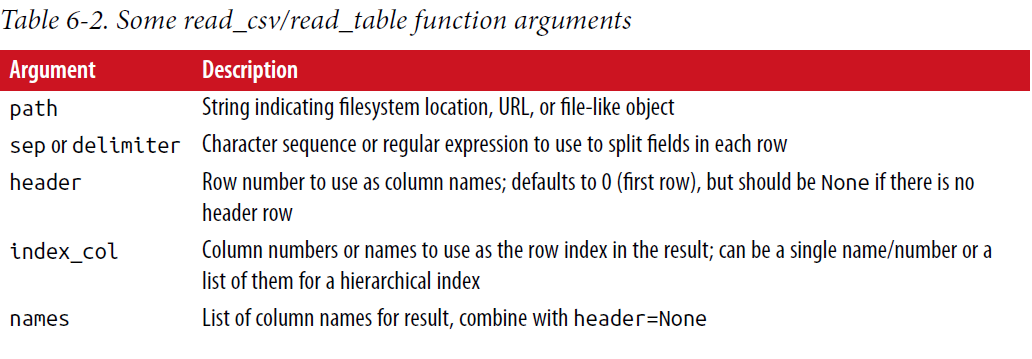


## Reading Text Files in Pieces

In [18]:
pd.read_csv('ex1.csv', nrows=5)

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20


In [23]:
chunker = pd.read_csv('ex1.csv', chunksize=5)
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['section'].value_counts(), fill_value=0)
    tot = tot.sort_values(ascending=False)
chunker
tot # the number of iteration a key takes in column

h    1.0
g    1.0
f    1.0
e    1.0
d    1.0
c    1.0
b    1.0
a    1.0
dtype: float64

In [26]:
data = pd.read_csv('ex1.csv')
data.to_csv('out.csv')
import sys  # writing to sys.stdout so it prints the text result to the console

In [27]:
data.to_csv(sys.stdout, sep='|')

|class|section|std1|std2|std3|std4
0|one|a|1|2|3|4
1|one|b|5|6|7|8
2|one|c|9|10|11|12
3|one|d|13|14|15|16
4|two|e|17|18|19|20
5|two|f|21|22|23|24
6|two|g|25|26|27|28
7|two|h|29|30|31|32


In [29]:
data.to_csv(sys.stdout, na_rep='NULL') # replace the NaN value to NULL or any other text

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [30]:
data.to_csv(sys.stdout, index=False, header=False)

one,a,1,2,3,4
one,b,5,6,7,8
one,c,9,10,11,12
one,d,13,14,15,16
two,e,17,18,19,20
two,f,21,22,23,24
two,g,25,26,27,28
two,h,29,30,31,32


In [32]:
data.to_csv(sys.stdout, index=False, columns=['std1', 'std2', 'std4'])

std1,std2,std4
1,2,4
5,6,8
9,10,12
13,14,16
17,18,20
21,22,24
25,26,28
29,30,32


In [43]:
dates = pd.date_range('1/1/2000', periods=10)
ts = pd.Series(np.arange(10), index=dates)
ts.to_csv('tseries.csv')
pd.read_csv('tseries.csv')

C:\Users\Asif\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


,2000-01-01,0
0,2000-01-02,1
1,2000-01-03,2
2,2000-01-04,3
3,2000-01-05,4
4,2000-01-06,5
5,2000-01-07,6
6,2000-01-08,7
7,2000-01-09,8
8,2000-01-10,9


## Working with Delimited Formats

In [46]:
import csv
f = open('ex1.csv')
reader = csv.reader(f)
for line in reader:
    print(line)

['class', 'section', 'std1', 'std2', 'std3', 'std4']
['one', 'a', '1', '2', '3', '4']
['one', 'b', '5', '6', '7', '8']
['one', 'c', '9', '10', '11', '12']
['one', 'd', '13', '14', '15', '16']
['two', 'e', '17', '18', '19', '20']
['two', 'f', '21', '22', '23', '24']
['two', 'g', '25', '26', '27', '28']
['two', 'h', '29', '30', '31', '32']


In [63]:
with open('ex1.csv') as f:
    lines = list(csv.reader(f))
header, values = lines[0], lines[1:]
data_dict = {h: v for h, v in zip(header, zip(*values))}
header
values
data_dict

{'class': ('one', 'one', 'one', 'one', 'two', 'two', 'two', 'two'),
 'section': ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'),
 'std1': ('1', '5', '9', '13', '17', '21', '25', '29'),
 'std2': ('2', '6', '10', '14', '18', '22', '26', '30'),
 'std3': ('3', '7', '11', '15', '19', '23', '27', '31'),
 'std4': ('4', '8', '12', '16', '20', '24', '28', '32')}

In [73]:

class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL
    reader = csv.reader(values , dialect = my_dialect)
reader

In [78]:
#reader = csv.reader(values, delimiter='|')
reader = csv.reader(values, delimiter='|')
reader

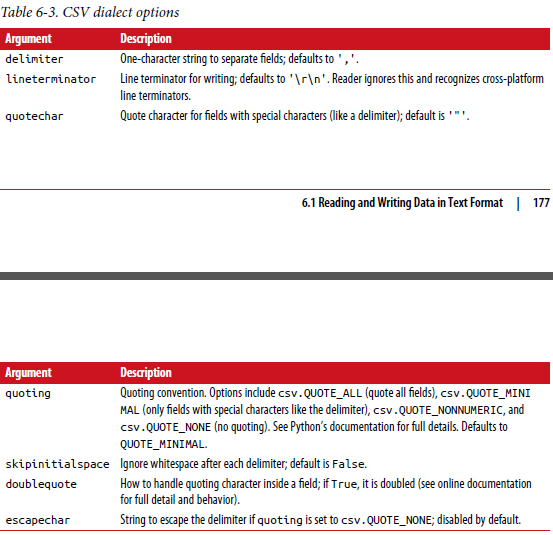

## JSON Data

In [80]:
obj = """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
obj

'\n{"name": "Wes",\n"places_lived": ["United States", "Spain", "Germany"],\n"pet": null,\n"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},\n{"name": "Katie", "age": 38,\n"pets": ["Sixes", "Stache", "Cisco"]}]\n}\n'

In [81]:
import json

In [86]:
result = json.loads(obj)

In [87]:
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [85]:
"""obj2 = {'class': ('one', 'one', 'one', 'one', 'two', 'two', 'two', 'two'),
        'section': ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'),
        'std1': ('1', '5', '9', '13', '17', '21', '25', '29'),
        'std2': ('2', '6', '10', '14', '18', '22', '26', '30'),
        'std3': ('3', '7', '11', '15', '19', '23', '27', '31'),
        'std4': ('4', '8', '12', '16', '20', '24', '28', '32')}
result = json.loads(obj2)
result
"""

TypeError: the JSON object must be str, bytes or bytearray, not dict

In [89]:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

## XML and HTML: Web Scraping

In [92]:
tables = pd.read_html('https://www.w3schools.com/html/html_tables.asp')
tables

[                        Company           Contact  Country
 0           Alfreds Futterkiste      Maria Anders  Germany
 1    Centro comercial Moctezuma   Francisco Chang   Mexico
 2                  Ernst Handel     Roland Mendel  Austria
 3                Island Trading     Helen Bennett       UK
 4  Laughing Bacchus Winecellars   Yoshi Tannamuri   Canada
 5  Magazzini Alimentari Riuniti  Giovanni Rovelli    Italy,
           Tag                                        Description
 0     <table>                                    Defines a table
 1        <th>                   Defines a header cell in a table
 2        <tr>                           Defines a row in a table
 3        <td>                          Defines a cell in a table
 4   <caption>                            Defines a table caption
 5  <colgroup>  Specifies a group of one or more columns in a ...
 6       <col>  Specifies column properties for each column wi...
 7     <thead>               Groups the header cont

In [93]:
len(tables)

2

In [94]:
failures = tables[0]

In [95]:
failures


,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


In [96]:
failures1 = tables[1]

In [97]:
failures1

,Tag,Description
0,<table>,Defines a table
1,<th>,Defines a header cell in a table
2,<tr>,Defines a row in a table
3,<td>,Defines a cell in a table
4,<caption>,Defines a table caption
5,<colgroup>,Specifies a group of one or more columns in a ...
6,<col>,Specifies column properties for each column wi...
7,<thead>,Groups the header content in a table
8,<tbody>,Groups the body content in a table
9,<tfoot>,Groups the footer content in a table


In [98]:
failures.head()

,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada


In [110]:
data = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

In [105]:
len(data)

1

In [111]:
failures = data[0]

In [112]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
1,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
2,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
3,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
4,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"


In [115]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
len('close_timestamps')

16

In [118]:
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2017      8
2015      8
2016      5
2001      4
2019      4
2004      4
2007      3
2003      3
2020      2
2000      2
Name: Closing Date, dtype: int64

## Parsing XML with lxml.objectify

In [119]:
from lxml import objectify

In [121]:
path = 'Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

FileNotFoundError: [Errno 2] No such file or directory: 'Performance_MNR.xml'

In [123]:
data = []
skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ','DESIRED_CHANGE', 'DECIMAL_PLACES']
for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
el_data[child.tag] = child.pyval
data.append(el_data)

NameError: name 'root' is not defined

In [126]:
perf = pd.DataFrame(data)

In [127]:
perf

""


In [128]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [130]:
root

<Element a at 0x220e41c4108>

In [133]:
href = root.get('href')
href

'http://www.google.com'

In [134]:
root.text

'Google'

## 6.2 Binary Data Formats

In [136]:
frame = pd.read_csv('ex1.csv')

In [137]:
frame

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [138]:
frame.to_pickle('frame_pickle')

In [139]:
frame = pd.read_pickle('frame_pickle')
frame

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [140]:
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

<class 'pandas.io.pytables.HDFStore'>
File path: mydata.h5

In [141]:
store['obj1']

,a
0,0.021551
1,0.851687
2,-0.172467
3,-0.652438
4,0.015414
5,-1.565072
6,2.022548
7,-1.336505
8,-0.169611
9,-2.473503


In [142]:
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])

,a
10,-1.226654
11,-1.502752
12,0.839853
13,-0.271558
14,1.802740
15,-0.902184


In [143]:
store.close()

In [144]:
frame.to_hdf('mydata.h5', 'obj3', format='table')
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

,a
0,0.021551
1,0.851687
2,-0.172467
3,-0.652438
4,0.015414


## Reading Microsoft Excel Files

In [145]:
xlsx = pd.ExcelFile('data.xlsx')

In [147]:
pd.read_excel(xlsx,'ex1') # 3x1 = sheet1

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [148]:
pd.read_excel(xlsx,'ex2') # ex2 = sheet2

,class,section,std1,std2,std3,std4
0,one,a,1,2,3,4
1,one,b,5,6,7,8
2,one,c,9,10,11,12
3,one,d,13,14,15,16
4,two,e,17,18,19,20
5,two,f,21,22,23,24
6,two,g,25,26,27,28
7,two,h,29,30,31,32


In [150]:
writer = pd.ExcelWriter('data.xlsx')
frame.to_excel(writer, 'ex2')
writer.save()
# You can also pass a file path to to_excel and avoid the ExcelWriter:
frame.to_excel('data.xlsx')

## 6.3 Interacting with Web APIs

In [151]:
import requests

In [152]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

In [153]:
# The Response object’s json method will return a dictionary containing JSON parsed into native Python objects:
data = resp.json()
data[0]['title']

"BUG: Series.where doesn't work with empty lists"

In [156]:
issues = pd.DataFrame(data, columns=['number', 'title','labels', 'state'])
issues.columns

Index(['number', 'title', 'labels', 'state'], dtype='object')

## 6.4 Interacting with Databases

In [25]:
import sqlite3

In [41]:
query = "CREATE TABLE test(a VARCHAR(20), b VARCHAR(20),c REAL, d INTEGER;"

In [42]:
con = sqlite3.connect('mydata.sqlite')


In [48]:
import sqlalchemy as sqla
import pandas as pd

In [50]:
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:http